Handwritten Recognition live image processing

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


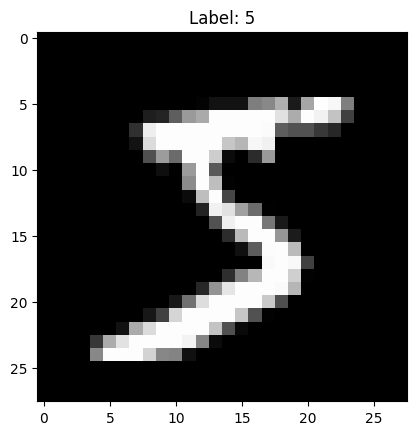

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Display an example digit
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [3]:
# Normalize the images
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape the data to include a channel dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

C:\Users\RJ\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7950 - loss: 0.6541 - val_accuracy: 0.9787 - val_loss: 0.0660
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9650 - loss: 0.1178 - val_accuracy: 0.9867 - val_loss: 0.0411
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9777 - loss: 0.0793 - val_accuracy: 0.9886 - val_loss: 0.0352
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9823 - loss: 0.0615 - val_accuracy: 0.9886 - val_loss: 0.0322
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9834 - loss: 0.0532 - val_accuracy: 0.9897 - val_loss: 0.0286
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9863 - loss: 0.0455 - val_accuracy: 0.9906 - val_loss: 0.0287
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9872 - loss: 0.0421 - val_accuracy: 0.9908 - val_loss: 0.0269
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9888 - loss: 0.0343 - 

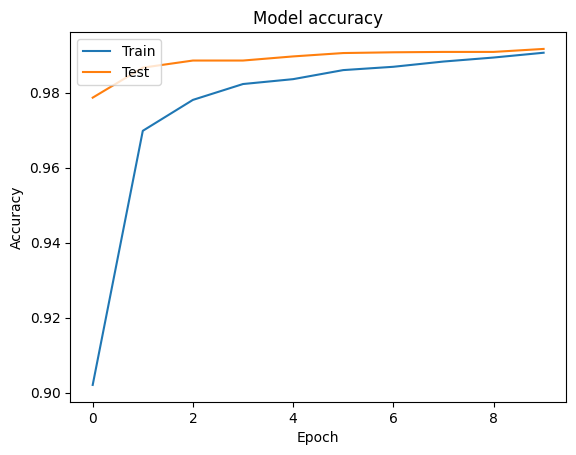

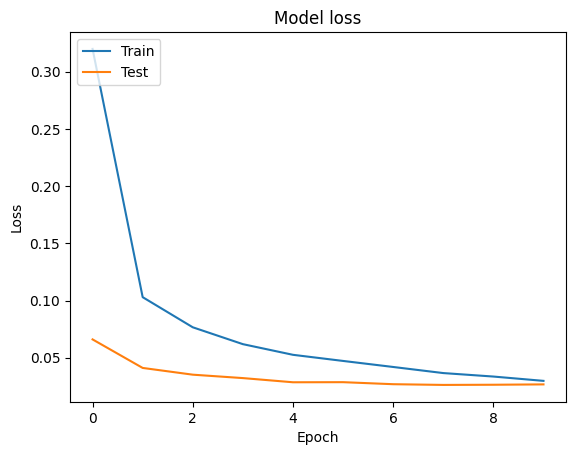

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9884 - loss: 0.0357
Test accuracy: 99.17%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


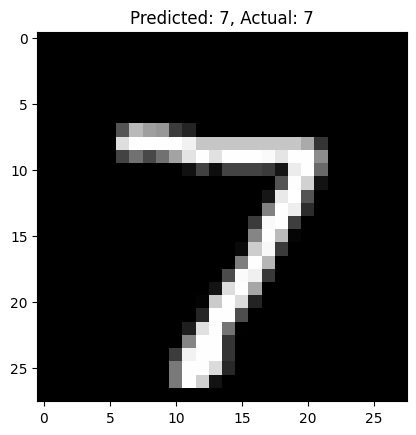

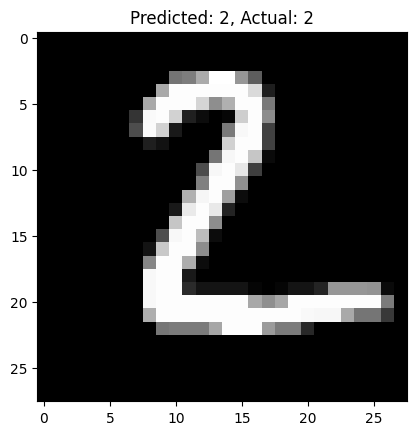

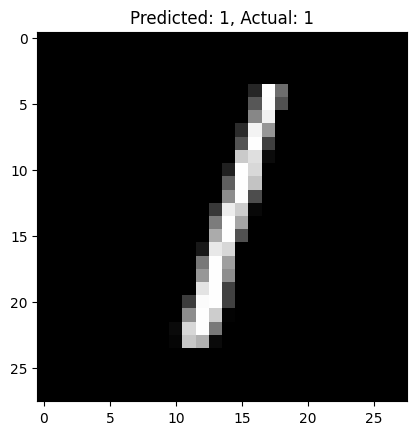

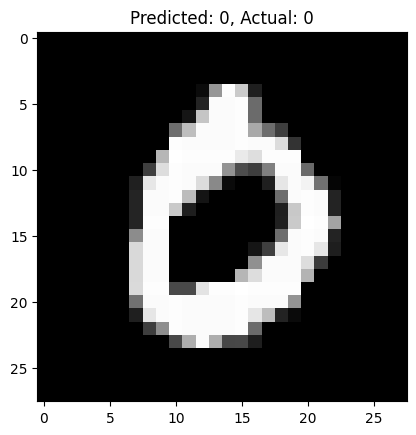

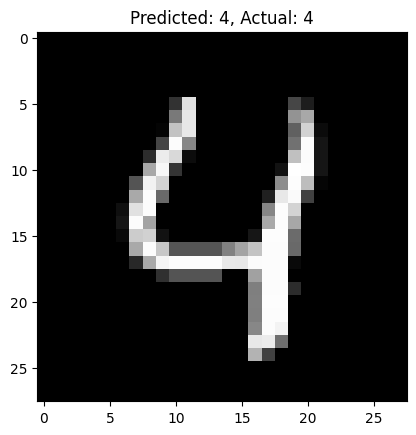

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Display some predictions
import numpy as np

predictions = model.predict(X_test[:5])
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    plt.show()

In [7]:
# Save the trained model in the new Keras format
model.save('mnist_cnn_model.keras')

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import pyscreenshot as ImageGrab
import time

# Load the saved Keras model
model = tf.keras.models.load_model("model/mnist_cnn_model.keras")

image_folder = "Project image/"

while True:
    # Capture the screenshot
    img = ImageGrab.grab(bbox=(60, 170, 400, 500))
    img.save(image_folder + "img.png")
    
    # Read and preprocess the image
    im = cv2.imread(image_folder + "img.png")
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
    
    # Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)
    
    # Prepare the data for prediction
    roi = roi.astype('float32') / 255.0  # Normalize
    roi = np.expand_dims(roi, axis=-1)  # Add channel dimension
    roi = np.expand_dims(roi, axis=0)  # Add batch dimension
    
    # Predict using the model
    predictions = model.predict(roi)
    predicted_label = np.argmax(predictions[0])
    print("Prediction:", predicted_label)
    
    # Display the result on the image
    cv2.putText(im, "Prediction is: " + str(predicted_label), (20, 20), 0, 0.8, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Show the image with prediction
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result", im)
    
    # Wait for 5 seconds before capturing the next image
    if cv2.waitKey(5000) == 27:  # Esc key to break
        break

cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
Prediction: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Prediction: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: 0
1/1 ━━━━━━━